In [27]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

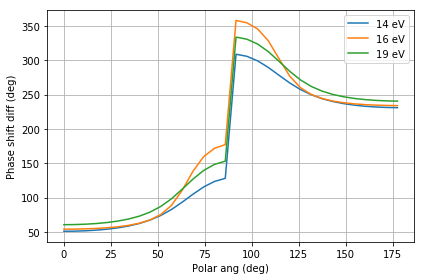

In [11]:
data = pd.read_excel("Data/Ne phase shift diffs.xlsx", sheet_name="Perturb")
# data[["Photon energy (eV)", "Polar ang (rad)", "Phase shift diff (rad)"]].head()


plt.figure()
plt.xlabel("Polar ang (deg)")
plt.ylabel("Phase shift diff (deg)")
for k, df in data.groupby("Photon energy (eV)"):
    plt.plot(df["Polar ang (deg)"], df["Phase shift diff (deg)"], label=f"{k:.0f} eV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

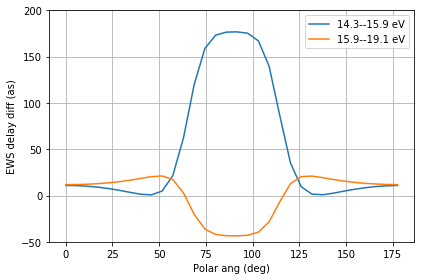

In [25]:
def sloop(df: pd.DataFrame) -> pd.DataFrame:
    x = df["Photon energy (eV)"].values
    index = pd.Index(x[:-1], name="Photon energy fr (eV)")
    dx = 2 * np.diff(x)
    dy = np.diff(df["Phase shift diff (rad)"])
    k = 24.1888432651 / 0.0367493
    return pd.DataFrame({
        "EWS delay diff (as)": dy / dx * k,
        "Photon energy fr (eV)": x[:-1],
        "Photon energy to (eV)": x[1:],
        "Polar ang (deg)": df["Polar ang (deg)"].iloc[0],
    }, index=index)


diff = (
    data
    .sort_values("Photon energy (eV)")  # Sort by photon energies
    .groupby("Polar ang (deg)")
    .apply(sloop)
)


plt.figure()
plt.xlabel("Polar ang (deg)")
plt.ylabel("EWS delay diff (as)")
for k, df in diff.reset_index(drop=True).groupby("Photon energy fr (eV)"):
    plt.plot(df["Polar ang (deg)"],
             df["EWS delay diff (as)"],
             label="{}--{} eV".format(df["Photon energy fr (eV)"].iloc[0],
                                      df["Photon energy to (eV)"].iloc[0]))
plt.ylim(-50, 200)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
with open("Data/Ne EWS delay diffs - Perturb.json", "w") as fp:
    json.dump(
        diff.to_dict("records"),
        fp,
        indent=2,
        sort_keys=True,
    )